In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = 'E:/Bootcamp/hospital/insurance.csv'  # Cambia esta ruta según corresponda
data = pd.read_csv(file_path)

# Exploración inicial
print("Primeras filas del dataset:")
print(data.head())
print("\nInformación del dataset:")
print(data.info())
print("\nDescripción estadística del dataset:")
print(data.describe())

Primeras filas del dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Descripción estadística del dataset:

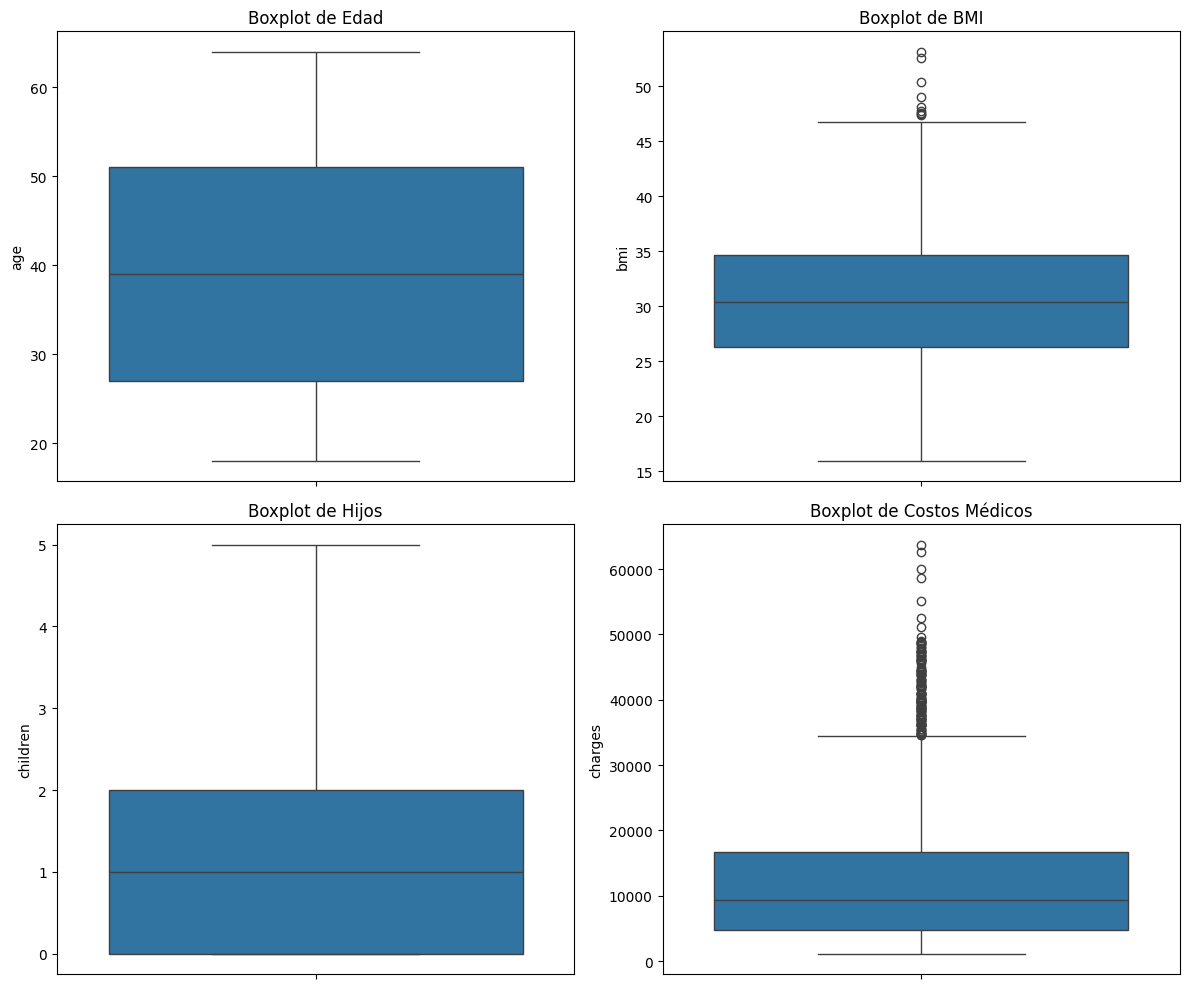

In [129]:
# Visualización de valores atípicos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(data=data, y="age", ax=axes[0, 0]).set(title="Boxplot de Edad")
sns.boxplot(data=data, y="bmi", ax=axes[0, 1]).set(title="Boxplot de BMI")
sns.boxplot(data=data, y="children", ax=axes[1, 0]).set(title="Boxplot de Hijos")
sns.boxplot(data=data, y="charges", ax=axes[1, 1]).set(title="Boxplot de Costos Médicos")
plt.tight_layout()
plt.show()

In [130]:
# Preprocesamiento: codificar variables categóricas y escalar variables numéricas
encoded_data = pd.get_dummies(data, columns=["sex", "smoker", "region"], drop_first=True)
scaler = StandardScaler()
numerical_features = ["age", "bmi", "children", "charges"]
encoded_data[numerical_features] = scaler.fit_transform(encoded_data[numerical_features])

In [131]:
# Separar características y variable objetivo
X = encoded_data.drop("smoker_yes", axis=1)  # Variable objetivo: "smoker_yes"
y = encoded_data["smoker_yes"]

In [132]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
# Entrenar y evaluar modelos
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{model_name} - Mean CV Accuracy: {scores.mean():.4f}")

Logistic Regression - Mean CV Accuracy: 0.9514
KNN - Mean CV Accuracy: 0.9364
Decision Tree - Mean CV Accuracy: 0.9533


In [134]:
# Optimización de hiperparámetros
# Regresion Logistica
logreg_params = {'C': [0.01, 0.1, 1, 10, 100]}
logreg_grid = GridSearchCV(LogisticRegression(), logreg_params, cv=5)
logreg_grid.fit(X_train, y_train)
print("Mejores parametros de Regresion logistica:", logreg_grid.best_params_)

# KNN
knn_params = {'n_neighbors': range(1, 20)}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train, y_train)
print("Mejores parametros de KNN:", knn_grid.best_params_)

# Arbol de decision
dt_params = {'max_depth': range(1, 10), 'min_samples_split': range(2, 10)}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
print("Mejores parametros del arbol de decisiones:", dt_grid.best_params_)

# Evaluación del mejor modelo
best_model = logreg_grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Reporte de clasificacion:")
print(classification_report(y_test, y_pred))

Mejores parametros de Regresion logistica: {'C': 1}
Mejores parametros de KNN: {'n_neighbors': 1}
Mejores parametros del arbol de decisiones: {'max_depth': 3, 'min_samples_split': 6}
Reporte de clasificacion:
              precision    recall  f1-score   support

       False       0.99      0.97      0.98       214
        True       0.89      0.94      0.92        54

    accuracy                           0.97       268
   macro avg       0.94      0.96      0.95       268
weighted avg       0.97      0.97      0.97       268



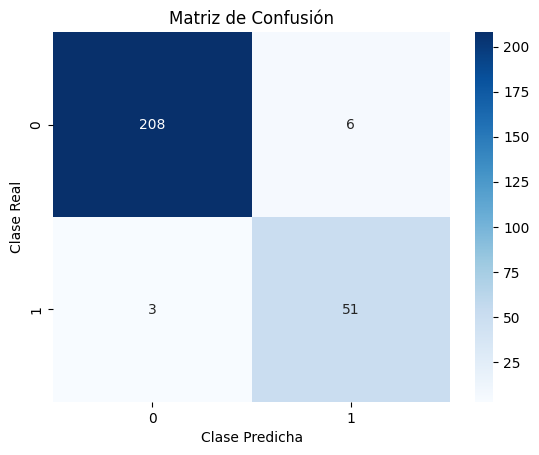

In [135]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.ylabel("Clase Real")
plt.xlabel("Clase Predicha")
plt.show()

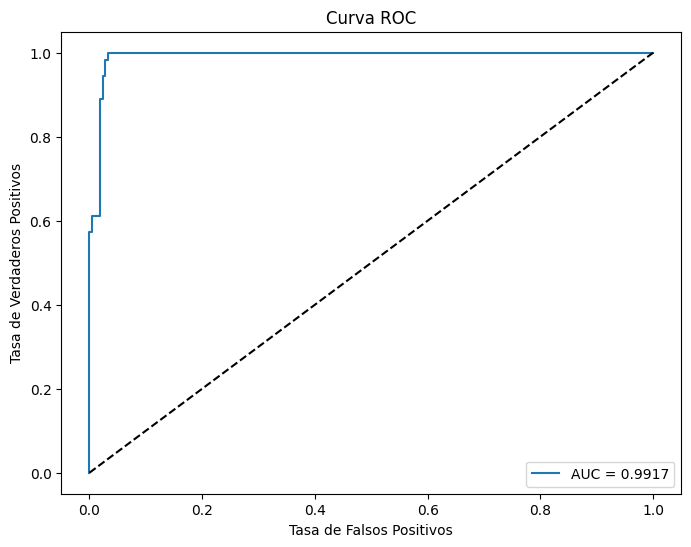

In [136]:
# Curva ROC
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Curva ROC")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.legend(loc="lower right")
plt.show()